# Implementation of transfer learning

In [1]:
# Importing libraries
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# resizing image to default input of VGG16
IMAGE_SIZE = [224,224]

In [3]:
# Providing training and test set
train_path = r"C:\Users\ASUS\Desktop\Ml_DL\projects\messy_or_clean_room_classification\archive\images\train"
valid_path = r"C:\Users\ASUS\Desktop\Ml_DL\projects\messy_or_clean_room_classification\archive\images\val"
test_path = r"C:\Users\ASUS\Desktop\Ml_DL\projects\messy_or_clean_room_classification\archive\images\test"


In [4]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape= IMAGE_SIZE + [3] , weights= 'imagenet', include_top=False)                        # [3] for rgb , colour channel


In [5]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False
    


In [6]:
# useful for getting number of classes
folders = glob(r"C:\Users\ASUS\Desktop\Ml_DL\projects\messy_or_clean_room_classification\archive\images\train\*")

In [7]:
# our  layers you can add more if you want
x = Flatten()(vgg.output)                                                                    
# defining output layer
prediction = Dense(len(folders), activation='softmax')(x)                                   # outputlayer, prediction according to no. of classes

#create  a  model object
model = Model(inputs=vgg.input, outputs = prediction)

In [8]:
# viewing structure of model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
# selecting cost an optimization for model
model.compile(
loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy']
)

In [10]:
# use image augmentation if needed
# preparing training_set and test_set
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(train_path,                                   # where training data located
                                               target_size=(224,224),                         # setting image size
                                               batch_size=32,                                 # batch of 32 according to gpu
                                               class_mode='categorical')                      # 50 classes named by character present

valid_set = test_datagen.flow_from_directory(valid_path,                                       # where test data located
                                               target_size=(224,224),                         # setting image size
                                               batch_size=32,                                 # batch of 32 according to gpu
                                               class_mode= 'categorical')                              # no classes is present so direct image

test_set = test_datagen.flow_from_directory(test_path,                                       # where test data located
                                               target_size=(224,224),                         # setting image size
                                               batch_size=32,                                 # batch of 32 according to gpu
                                               class_mode= None)                              # no classes is present so direct image




Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 10 images belonging to 1 classes.


In [17]:
# fit the model
r = model.fit(
training_set,
validation_data=valid_set,
epochs=5)

Epoch 1/5
6/6 [==============================] - 14s 2s/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 0.0345 - val_accuracy: 1.0000
Epoch 2/5
6/6 [==============================] - 14s 2s/step - loss: 0.0184 - accuracy: 1.0000 - val_loss: 0.0234 - val_accuracy: 1.0000
Epoch 3/5
6/6 [==============================] - 14s 2s/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.0153 - val_accuracy: 1.0000
Epoch 4/5
6/6 [==============================] - 14s 2s/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0183 - val_accuracy: 1.0000
Epoch 5/5
6/6 [==============================] - 14s 2s/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0147 - val_accuracy: 1.0000


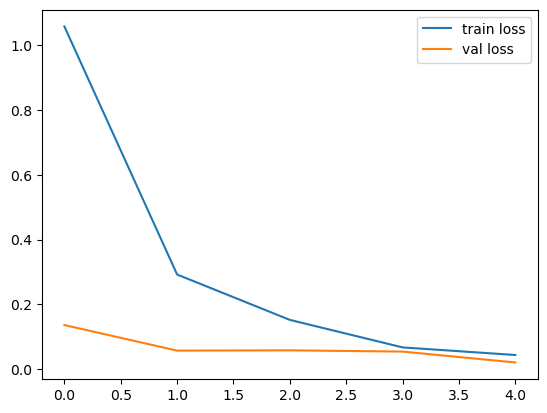

<Figure size 640x480 with 0 Axes>

In [12]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('Loss')

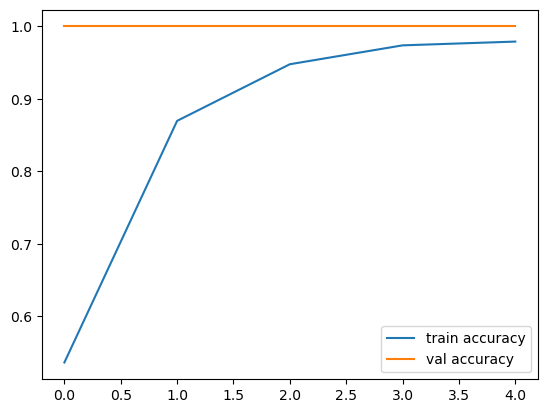

<Figure size 640x480 with 0 Axes>

In [13]:
#accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('Accuracy')

In [14]:
import tensorflow as tf
from keras.models import load_model
model.save('Messy_vs_clean_room_classifier_model.h5')

In [15]:
# checking on test data
np.argmax(model.predict(test_set[0]), axis=1)

1/1 [==============================] - 1s 821ms/step


array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

1/1 [==============================] - 0s 188ms/step


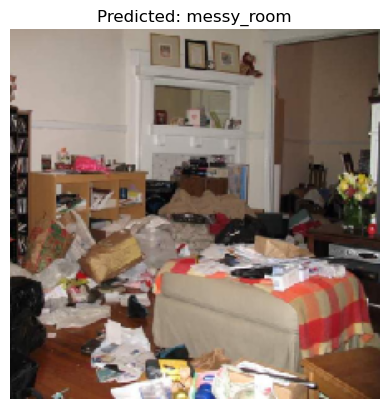

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import img_to_array,load_img
from keras.utils import load_img

def model_predict(model, preprocessed_image, class_labels):
    # Make predictions
    predictions = model.predict(np.array([preprocessed_image]))
    predicted_class_index = np.argmax(predictions)
    predicted_class_label = class_labels[predicted_class_index]

    # Display the image with prediction result
    plt.imshow(preprocessed_image)  
    plt.title(f'Predicted: {predicted_class_label}')
    plt.axis('off')
    plt.show()

    return predicted_class_label
def preprocess_function(img):
    img = img/255.
    return img

# Example by making some prediction
model = tf.keras.models.load_model(r"C:\Users\ASUS\Desktop\Ml_DL\code\Messy_vs_clean_room_classifier_model.h5")
class_labels = ['clean_room', 'messy_room']  # Replace with your class labels

# Load and preprocess the test image
test_img_path = r"C:\Users\ASUS\Desktop\Ml_DL\projects\messy_or_clean_room_classification\archive\images\test\test\.png"
image = load_img(test_img_path, target_size=(224, 224,3))  # Adjust target_size as needed
image_array = img_to_array(image)
preprocessed_image = preprocess_function(image_array)  # Apply the same preprocessing as during training

# Call the model_predict function
result = model_predict(model, preprocessed_image, class_labels)
